In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [18]:
df= pd.read_csv("ToyotaCorolla.csv")
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [19]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [20]:
# Removing ID column
df.drop(["Id"], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [30]:
# To select the features having continuous data i.e. without catagorical data
numeric_list = ["int16","int32", "int64", "float16", "float32", "float64"]
numeric_col = list(df.select_dtypes(include=numeric_list))

In [32]:
numeric_col # columns with catagorical data only

['Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [33]:
df1 = df[numeric_col]

In [35]:
df1.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0


In [38]:
X = df1.drop("Price", axis=1)
y = df1.iloc[:, 0]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
# To find mutual infomation
mut_info = mutual_info_regression(X_train, y_train)
mut_info

array([0.62197893, 0.01222321, 0.59360541, 0.24394296, 0.16606019,
       0.05165605, 0.        , 0.01245609, 0.        , 0.0228542 ,
       0.00131286, 0.1680888 , 0.23598109, 0.00307665, 0.02454835,
       0.00706806, 0.08008435, 0.04132544, 0.05649069, 0.14537047,
       0.0994517 , 0.27567871, 0.14617459, 0.10640885, 0.08601346,
       0.00597835, 0.        , 0.02140268, 0.06107079, 0.        ,
       0.01451347, 0.02044998, 0.        ])

In [43]:
mut_info = pd.Series(mut_info)
mut_info.index = X_train.columns
mut_info.sort_values(ascending=False)

Age_08_04           0.621979
Mfg_Year            0.593605
Boardcomputer       0.275679
KM                  0.243943
Weight              0.235981
Quarterly_Tax       0.168089
HP                  0.166060
CD_Player           0.146175
Airco               0.145370
Central_Lock        0.106409
Automatic_airco     0.099452
Powered_Windows     0.086013
ABS                 0.080084
Sport_Model         0.061071
Airbag_2            0.056491
Met_Color           0.051656
Airbag_1            0.041325
BOVAG_Guarantee     0.024548
Cylinders           0.022854
Mistlamps           0.021403
Radio_cassette      0.020450
Metallic_Rim        0.014513
cc                  0.012456
Mfg_Month           0.012223
Guarantee_Period    0.007068
Power_Steering      0.005978
Mfr_Guarantee       0.003077
Gears               0.001313
Backseat_Divider    0.000000
Automatic           0.000000
Radio               0.000000
Doors               0.000000
Tow_Bar             0.000000
dtype: float64

<AxesSubplot:>

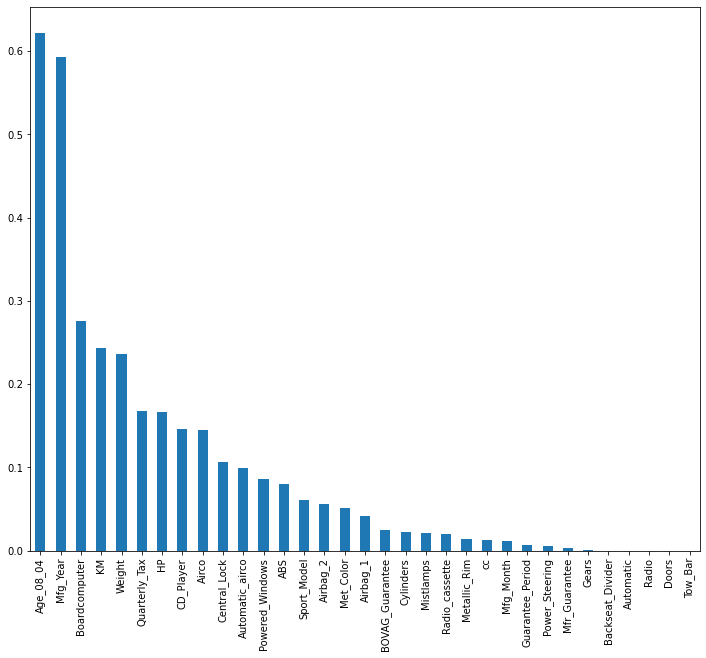

In [49]:
plt.figure(figsize=(12, 10))
mut_info.sort_values(ascending=False).plot.bar()

# Alternate method using SelectKBest class

In [50]:
# Selecting top 10 features
top_col = SelectKBest(mutual_info_regression, k=10 )
top_col.fit(X_train, y_train)

SelectKBest(score_func=<function mutual_info_regression at 0x0000029DD82F8280>)

In [51]:
top_col.get_support()

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False])

In [54]:
X_train.columns[top_col.get_support()]

Index(['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player'],
      dtype='object')

In [55]:
scores = top_col.scores_

In [56]:
scores = pd.Series(scores)
scores.index = X_train.columns
scores.sort_values(ascending=False)

Age_08_04           0.628975
Mfg_Year            0.611185
Boardcomputer       0.270196
KM                  0.219042
Weight              0.217303
HP                  0.213419
Quarterly_Tax       0.162067
CD_Player           0.125760
Airco               0.124029
Automatic_airco     0.113759
Central_Lock        0.080361
Sport_Model         0.068743
Airbag_2            0.063603
Powered_Windows     0.058751
Mistlamps           0.056908
ABS                 0.052208
cc                  0.046649
Radio               0.046318
Gears               0.043176
Radio_cassette      0.038891
Met_Color           0.024400
Airbag_1            0.022269
Tow_Bar             0.020414
Doors               0.019025
Automatic           0.014613
Power_Steering      0.014214
Metallic_Rim        0.010081
Mfg_Month           0.007567
Backseat_Divider    0.007308
Cylinders           0.000000
Mfr_Guarantee       0.000000
BOVAG_Guarantee     0.000000
Guarantee_Period    0.000000
dtype: float64

<AxesSubplot:>

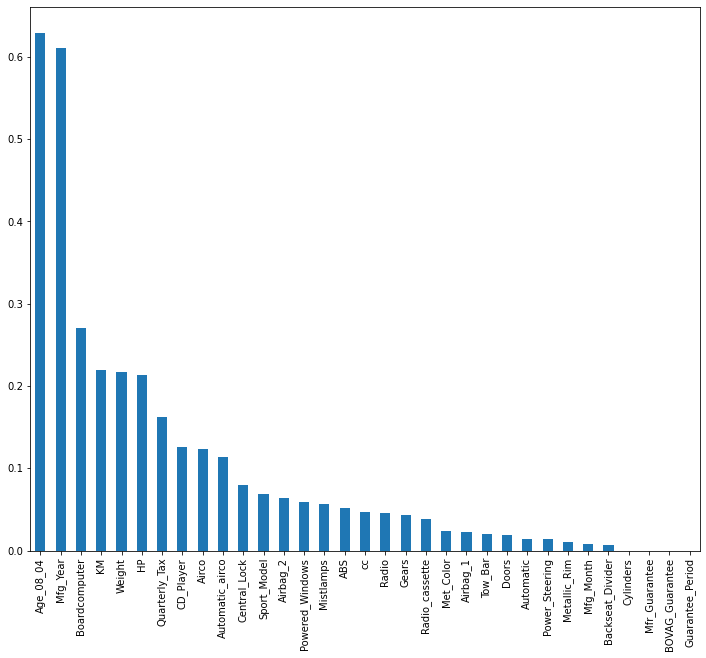

In [57]:
plt.figure(figsize=(12, 10))
scores.sort_values(ascending=False).plot.bar()

# Alternate method using SelectPercentile

In [58]:
# Selecting top 20 precentile
top_feat= SelectPercentile(mutual_info_regression, percentile=20)
top_feat.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000029DD82F8280>)

In [59]:
top_feat.get_support()

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

In [60]:
X_train.columns[top_feat.get_support()]

Index(['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Quarterly_Tax', 'Weight',
       'Boardcomputer'],
      dtype='object')

In [61]:
scores_per = top_feat.scores_

In [62]:
scores_per = pd.Series(scores_per)
scores_per.index = X_train.columns
scores_per.sort_values(ascending=False)

Age_08_04           0.607672
Mfg_Year            0.590963
KM                  0.243990
Boardcomputer       0.239009
Weight              0.202396
HP                  0.195531
Quarterly_Tax       0.162243
CD_Player           0.139109
Airco               0.129784
ABS                 0.106362
Automatic_airco     0.101128
Sport_Model         0.079983
Airbag_2            0.078023
Powered_Windows     0.068217
Central_Lock        0.064099
Radio               0.064096
Backseat_Divider    0.049856
Gears               0.045380
Met_Color           0.034174
Metallic_Rim        0.033492
Radio_cassette      0.032935
Tow_Bar             0.025464
BOVAG_Guarantee     0.015318
Guarantee_Period    0.011128
Cylinders           0.010353
cc                  0.009679
Power_Steering      0.009160
Mfr_Guarantee       0.003057
Airbag_1            0.000000
Mfg_Month           0.000000
Mistlamps           0.000000
Doors               0.000000
Automatic           0.000000
dtype: float64

<AxesSubplot:>

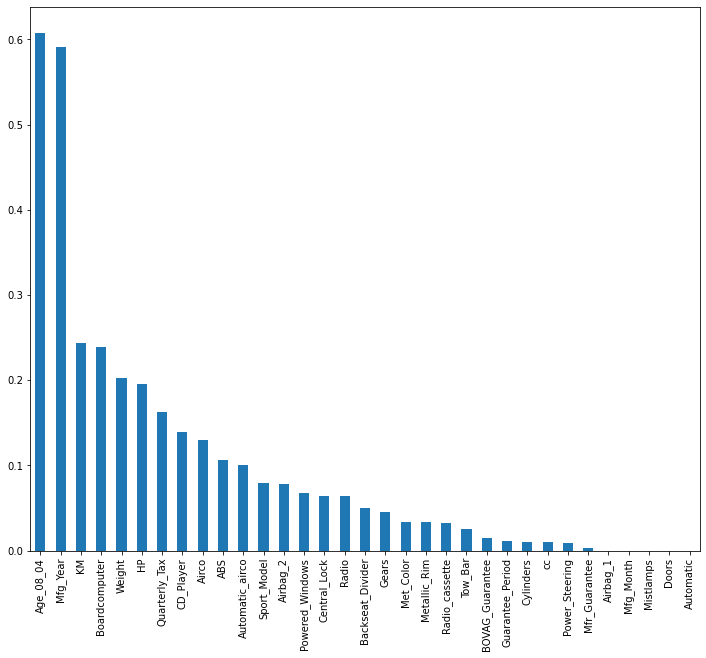

In [64]:
plt.figure(figsize=(12, 10))
scores_per.sort_values(ascending=False).plot.bar()